L'objectif est développer un modèle de classification visant à prédire si une vidéo deviendra populaire ou non, en nous appuyant sur le jeu de données YouTube Trending Videos disponible sur Kaggle https://www.kaggle.com/datasets/thedevastator/youtube-trending-videos-dataset/data.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install xgboost
!pip install lightgbm
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importation des modules
import matplotlib.pyplot as plt
import seaborn as sns           
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **Etape 1**: Exploratory Data Analysis (EDA)

## Décoverte du dataset

**1. Découverte du dataset**

In [3]:
#Importation du dataset
df = pd.read_csv("youtube.csv")
# affichage des 5 premières lignes.
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


**2. Décrivez le dataset :**

In [4]:
df.shape

(161470, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [6]:
# Afficher un aperçu des valeurs manquantes
print(" Aperçu des valeurs manquantes :\n")
print(df.isnull().sum())  # Nombre de valeurs NaN par colonne


 Aperçu des valeurs manquantes :

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64


## Analyse des variables

In [7]:
# Descrition des variables
df.describe()

,index,category_id,views,likes,dislikes,comment_count
count,161470.00000,161470.000000,1.614700e+05,1.614700e+05,1.614700e+05,1.614700e+05
mean,80734.50000,19.461151,2.419854e+06,6.566194e+04,3.490153e+03,7.035494e+03
std,46612.51832,7.432001,1.043749e+07,2.260617e+05,3.114779e+04,3.404121e+04
min,0.00000,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,40367.25000,15.000000,1.015382e+05,1.975000e+03,8.500000e+01,2.790000e+02
50%,80734.50000,23.000000,3.847395e+05,9.840000e+03,3.480000e+02,1.144000e+03
75%,121101.75000,24.000000,1.339528e+06,4.006275e+04,1.350000e+03,4.144750e+03
max,161469.00000,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [8]:
# Pour les variables catégorielles
df['publish_country'].value_counts()

publish_country
US        40949
CANADA    40881
FRANCE    40724
GB        38916
Name: count, dtype: int64

In [9]:
# Pour les variables booléenes
df[['comments_disabled','ratings_disabled','video_error_or_removed']].mean()

comments_disabled         0.017266
ratings_disabled          0.008819
video_error_or_removed    0.000873
dtype: float64

In [10]:
# Création de la variable cible 
df['popular'] = (df['views'] > df['views'].median()).astype(int)
df

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,popular
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False,1
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,1
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False,1
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False,0
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,13/06/2018,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False,0
161466,161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,13/06/2018,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False,0
161467,161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,11/06/2018,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False,1
161468,161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,13/06/2018,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False,0


**Justification:** 
Le nombre de vues étant une variable continu fortement asymétrique, nous avons choisi de transformer
la notion de popularité en une variable binaire; Une vidéo est considérée comme populaire si son nombre de vues est supérieur
à la médiane du dataset; Cette approche permet de formuler le problème comme une classification supervisée, plus stable et plus 
interprétable dans un cadre pédagogique.

In [11]:
#variable cible
y = df['popular']

# Variables explicatives
X = df.drop(columns=['popular', 'views'], errors='ignore')

## Visualisations des données

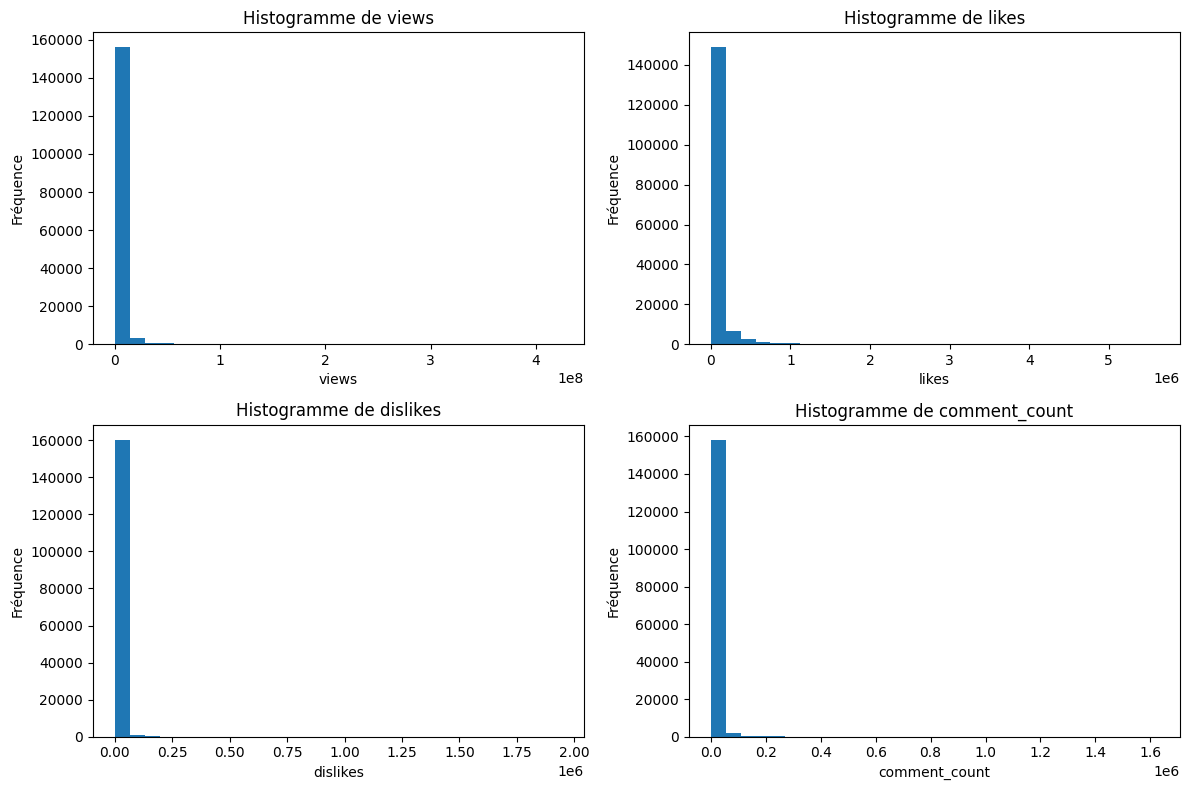

In [12]:
#Visualisation des données
# Histogrammes des variables quatitatives

quant_vars = ['views', 'likes', 'dislikes', 'comment_count']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(quant_vars):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(f"Histogramme de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()

Les histogrammes révèlent des distributions fortement asymétriques pour toutes les variables quantitatives, avec une concentration importante de faibles valeurs et la présence de valeurs extrêmes correspondant à des vidéos virales.

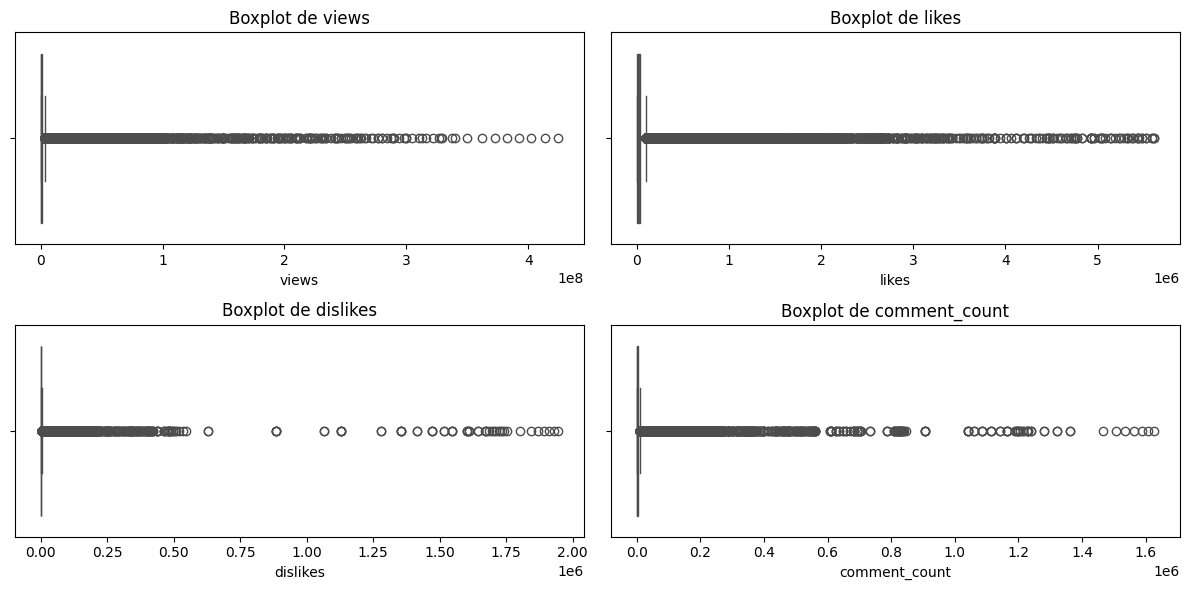

In [13]:
#Boxplots des outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(quant_vars):
    sns.boxplot(x=df[col], ax=axes[i], color="red")
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [14]:
#Foction de détection du nombre de outliers pour chaque variable quantitative
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column} : {len(outliers)} valeurs aberrantes détectées")
    return outliers

outlier_dict = {}

for col in quant_vars:
    outlier_dict[col] = detect_outliers_iqr(df, col)

views : 20447 valeurs aberrantes détectées
likes : 22428 valeurs aberrantes détectées
dislikes : 21963 valeurs aberrantes détectées
comment_count : 21434 valeurs aberrantes détectées


#### Gestion de valeurs abérantes
La détection des valeurs aberrantes à l’aide de la méthode de l’intervalle interquartile (IQR) a révélé un nombre important d’outliers pour les variables liées à l’engagement (views, likes, dislikes, comment_count). Ces valeurs extrêmes correspondent à des vidéos fortement virales et constituent une information pertinente pour l’analyse de la popularité.. Elles ont donc été conservées afin de préserver la distribution réelle des données. 

In [15]:
#Matrice de correlation
corr = df[['views','likes','dislikes','comment_count']].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.786897,0.414189,0.499026
likes,0.786897,1.000000,0.453304,0.776422
dislikes,0.414189,0.453304,1.000000,0.732969
comment_count,0.499026,0.776422,0.732969,1.000000


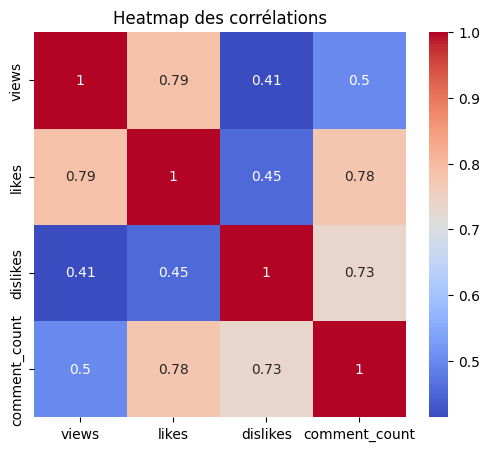

In [16]:
# Heatmap des correlations
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations")
plt.show()


L’analyse de la matrice de corrélation montre que le nombre de likes est fortement corrélé au nombre de vues, 
ce qui confirme son rôle central dans la mesure de la popularité d’une vidéo. Le nombre de commentaires est également 
lié à l’engagement global, tandis que les dislikes présentent une influence plus modérée.
Ces résultats justifient l’utilisation des variables d’engagement comme variables explicatives dans le modèle de classification.

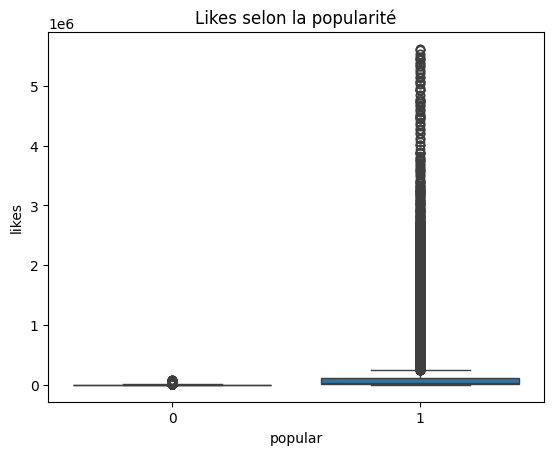

In [17]:
sns.boxplot(x='popular', y='likes', data=df)
plt.title("Likes selon la popularité")
plt.show()


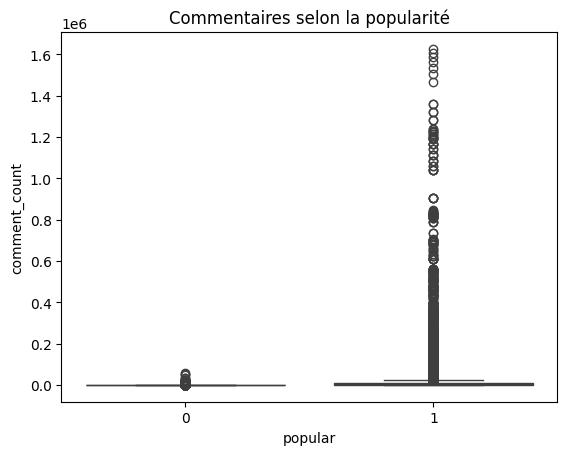

In [18]:
sns.boxplot(x='popular', y='comment_count', data=df)
plt.title("Commentaires selon la popularité")
plt.show()


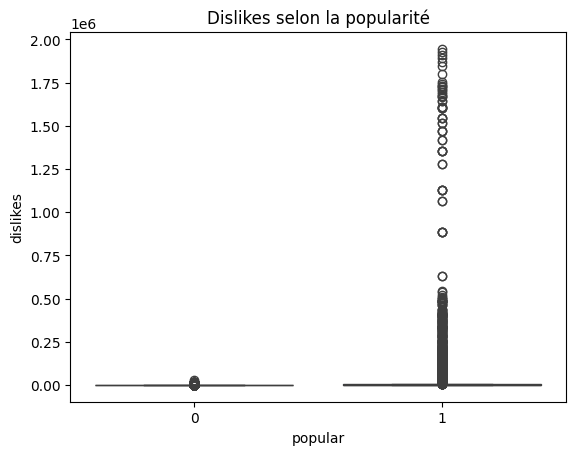

In [19]:
sns.boxplot(x='popular', y='dislikes', data=df)
plt.title("Dislikes selon la popularité")
plt.show()


# **Etape 2**: Preprocessing des Données

### Vérification des doublons

In [20]:
# Nombre total de doublons
df.duplicated().sum()

np.int64(0)

### Identification des variables catégorielles

In [21]:
cat_vars = df.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_vars

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'publish_date',
 'time_frame',
 'published_day_of_week',
 'publish_country',
 'tags',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed']

### Feature Engeneering

In [22]:
df_model = df.copy()

In [23]:
def date_to_season(trending_date):
    month = trending_date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

# Convert the 'Date' column to datetime format
df_model['trending_date'] = pd.to_datetime(df['trending_date'],format='%y.%d.%m')

# Apply the function to the 'publish_date' column
df_model['Season'] = df_model['trending_date'].apply(date_to_season)


In [24]:
# 1. Conversion des colonnes en format Datetime (si ce n'est pas déjà fait)
df_model['publish_date'] = pd.to_datetime(df_model['publish_date'])

#Features temporelles
df_model['is_week_end'] = df_model['published_day_of_week'].isin(
    ['Friday', 'Saturday', 'Sunday']
).astype(int)

# Calcul de la Vitesse de Viralité (Days to Trending)
# On retire les fuseaux horaires pour permettre la soustraction
publish_date = df_model['publish_date'].dt.tz_localize(None)
df_model['days_to_trending'] = (df_model['trending_date'] - publish_date).dt.days

# On remplace les valeurs négatives potentielles (erreurs de log) par 0
df_model['days_to_trending'] = df_model['days_to_trending'].clip(lower=0)


C:\Users\OULADKRIT\AppData\Local\Temp\ipykernel_18532\2002823015.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_model['publish_date'] = pd.to_datetime(df_model['publish_date'])


In [25]:
# 1. Analyse du Titre
# Longueur du titre (caractères)
df_model['title_length'] = df_model['title'].str.len()

# Nombre de mots en MAJUSCULES (souvent utilisé pour le Clickbait)
df_model['title_caps_word_count'] = df_model['title'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

# 2. Analyse des Tags
# Nombre de tags (séparés par le caractère '|')
# Si 'none', on met 0, sinon on compte les séparateurs
df_model['tag_count'] = df_model['tags'].apply(lambda x: 0 if x == '[none]' else len(x.split('|')))


In [26]:

#Engagement global
df_model['engagement'] = (
    df_model['likes'] +
    df_model['dislikes'] +
    df_model['comment_count']
)

# Feature liées aux restrictions
df_model['comments_enabled'] = (~df_model['comments_disabled']).astype(int)
df_model['ratings_enabled'] = (~df_model['ratings_disabled']).astype(int)


Le feature engineering a permis d’enrichir le dataset en créant de nouvelles variables plus représentatives de l’engagement des utilisateurs. Ces nouvelles features offrent une meilleure description du comportement des vidéos YouTube et contribuent à améliorer la capacité des modèles à prédire la popularité des vidéos.

**Nettoyage : Suppression des colonnes non pertinentes, temporelles et textuelles originales**

In [27]:
cols_to_drop = ['index','video_id','views','likes','dislikes', 'trending_date','time_frame','publish_date', 'published_day_of_week','title', 'tags', 'channel_title','comments_disabled','ratings_disabled','comment_count','video_error_or_removed', 'days_to_trending']
df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])

### Variables supprimées ou transformées

- **index, video_id**  
  Identifiants uniques sans valeur prédictive.

- **views, likes, dislikes, comment_count**  
  Risque de *data leakage*.  
  > `likes`, `dislikes` et `comment_count` ont été utilisés pour créer la variable **engagement** lors du feature engineering.

- **trending_date, publish_date**  
  Format date brut inexploitable directement par les algorithmes.  
  Risque de *data leakage* pour `trending_date` (variable décrivant le futur).  
  > `trending_date` a servi à créer **Season**  
  > `publish_date` a servi à créer **days_to_trending**

- **time_frame, published_day_of_week, days_to_trending**  
  Variables temporelles redondantes.  
  > `published_day_of_week` a servi à créer **is_week_end**  
  > <span style="color:red">days_to_trending</span>, malgré sa création en feature engineering, montre une corrélation proche de 0 avec la variable cible.

- **title, tags, channel_title**  
  Données textuelles non structurées (nécessitent un traitement NLP).  
  > `title` → **title_length**, **title_caps_word_count**  
  > `tags` → **tag_count**

- **comments_disabled, ratings_disabled, video_error_or_removed**  
  Trop peu de variations → faible utilité statistique.  
  > `comments_disabled` → **comments_enabled**  
  > `ratings_disabled` → **ratings_enabled**


In [28]:
df_model.publish_country.unique()

array(['US', 'GB', 'FRANCE', 'CANADA'], dtype=object)

In [29]:
df_model.Season.unique()

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [30]:
df_model['category_id'].value_counts()


category_id
24    42358
10    27903
22    15960
23    13401
25    11623
17    11210
26    10442
1      9139
20     5408
28     4876
27     3873
15     2060
2      1554
19     1009
29      335
43      300
30       17
44        2
Name: count, dtype: int64

In [31]:
# category_id (description de feature): chaque valeur unique represent un type de video (ex: 20 for Gaming, 28 : Science & Tech ...)
# Regroupement des catégories rares pour éviter le sur-apprentissage (overfitting) 
# On définit un seuil (ex: moins de 500 vidéos)
counts = df_model['category_id'].value_counts()
categories_a_regrouper = counts[counts < 500].index

# On les nomme "Autres" (ID 0)
df_model['category_id'] = df_model['category_id'].replace(categories_a_regrouper, 0) 

In [32]:
# One-Hot Encoding
# this cell should be excecuted only one time
df_model = pd.get_dummies(df_model, columns=['publish_country'], prefix='country', dtype=int)
df_model = pd.get_dummies(df_model, columns=['Season'], prefix='season', dtype=int)

**Pourquoi One-Hot Encoding ?**  
`publish_country` et `Season` sont des variables catégorielles nominales.  
On les convertit en variables binaires (0/1) pour les rendre utilisables par les modèles ML, et éviter que le modèle interprète une catégorie comme plus importante qu’une autre.

In [33]:
df_model.sample(5)

,category_id,popular,is_week_end,title_length,title_caps_word_count,tag_count,engagement,comments_enabled,ratings_enabled,country_CANADA,country_FRANCE,country_GB,country_US,season_Autumn,season_Spring,season_Summer,season_Winter
115310,24,0,0,47,0,29,545,1,1,0,1,0,0,1,0,0,0
70526,23,1,0,53,0,35,65993,1,1,0,0,1,0,1,0,0,0
23152,28,0,0,31,0,24,20329,1,1,0,0,0,1,1,0,0,0
92976,10,1,0,46,0,8,62031,1,1,0,1,0,0,0,0,1,0
45820,20,1,1,53,1,38,89981,1,1,0,0,1,0,0,0,1,0


In [34]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   category_id            161470 non-null  int64
 1   popular                161470 non-null  int64
 2   is_week_end            161470 non-null  int64
 3   title_length           161470 non-null  int64
 4   title_caps_word_count  161470 non-null  int64
 5   tag_count              161470 non-null  int64
 6   engagement             161470 non-null  int64
 7   comments_enabled       161470 non-null  int64
 8   ratings_enabled        161470 non-null  int64
 9   country_CANADA         161470 non-null  int64
 10  country_FRANCE         161470 non-null  int64
 11  country_GB             161470 non-null  int64
 12  country_US             161470 non-null  int64
 13  season_Autumn          161470 non-null  int64
 14  season_Spring          161470 non-null  int64
 15  season_Summer    

In [35]:
df_model['popular'].value_counts(normalize=True)

popular
1    0.5
0    0.5
Name: proportion, dtype: float64

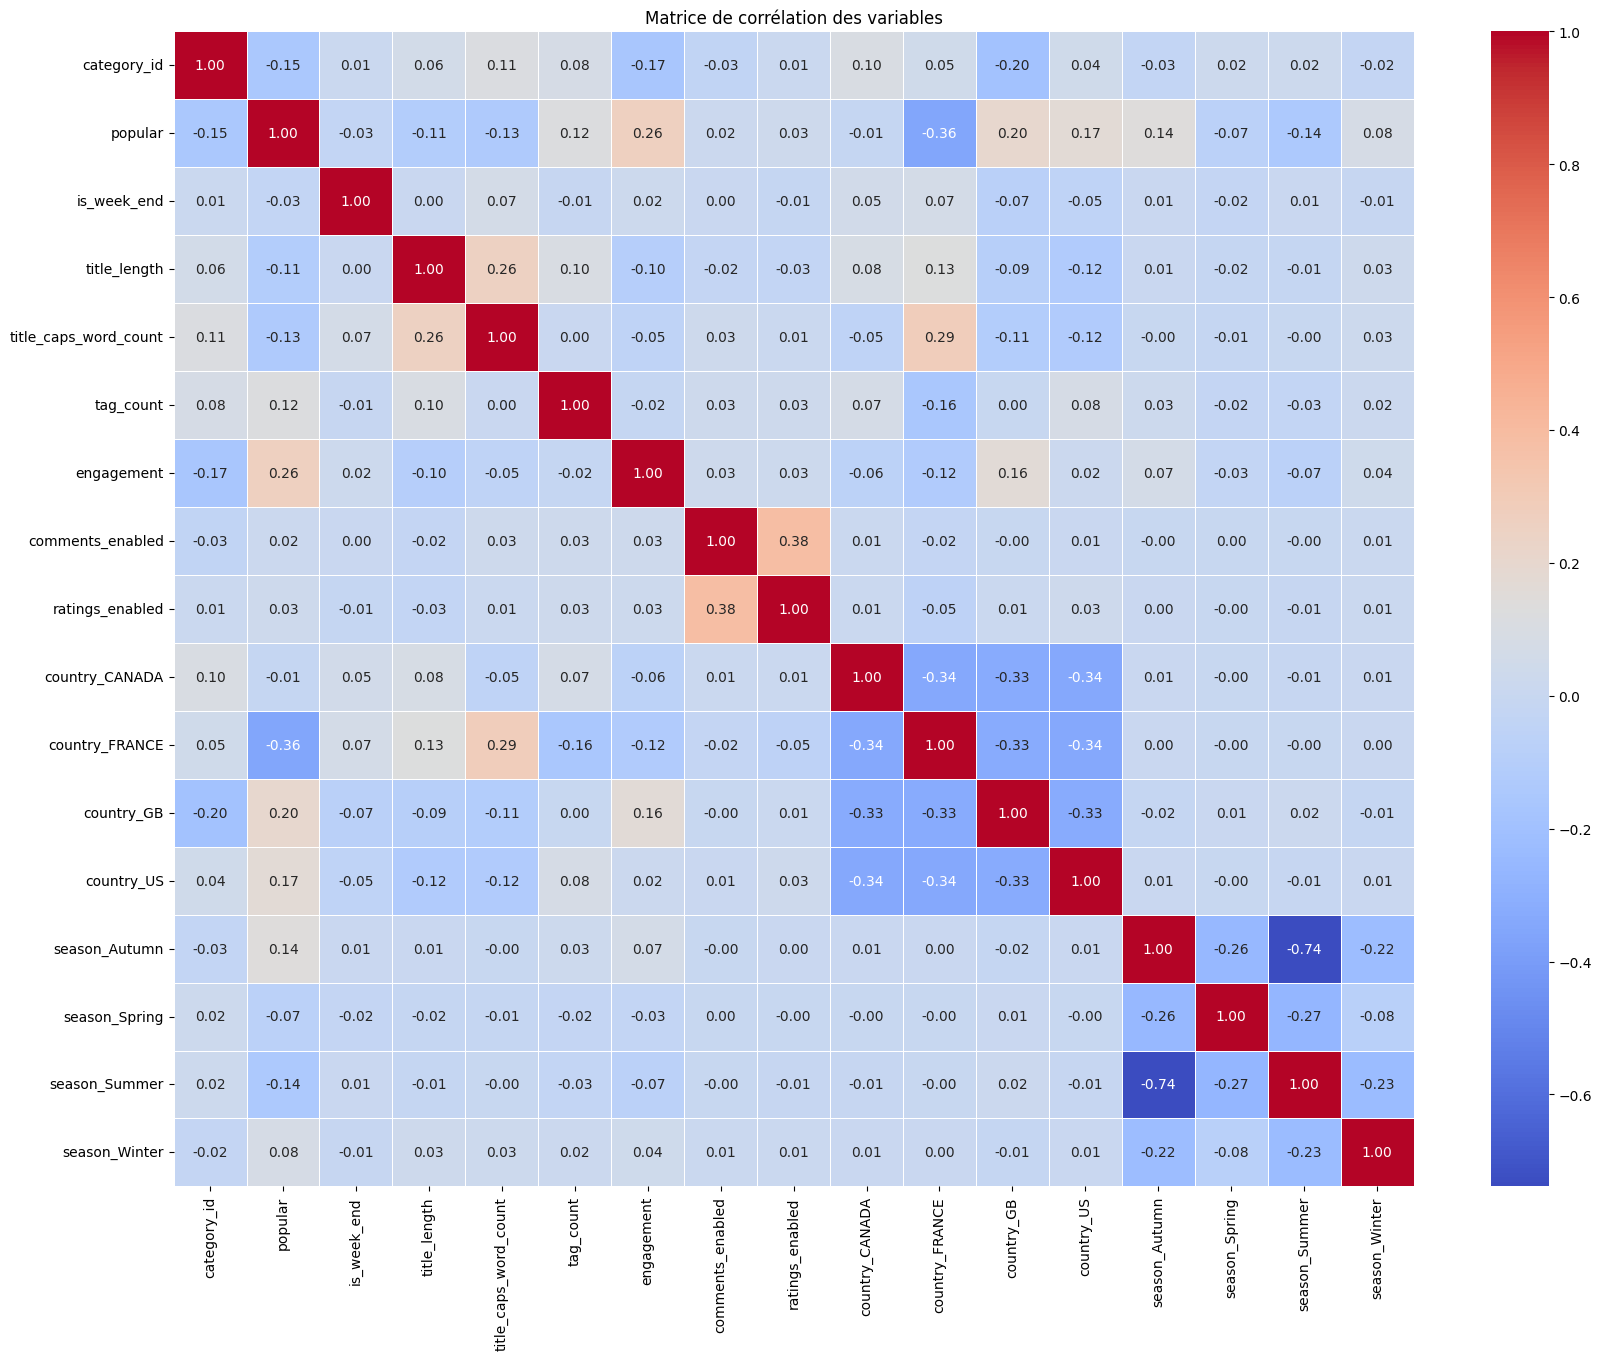

In [36]:
plt.figure(figsize=(20, 15)) # Un peu plus grand pour mieux lire
# On ajoute .corr() pour calculer la matrice de corrélation
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()

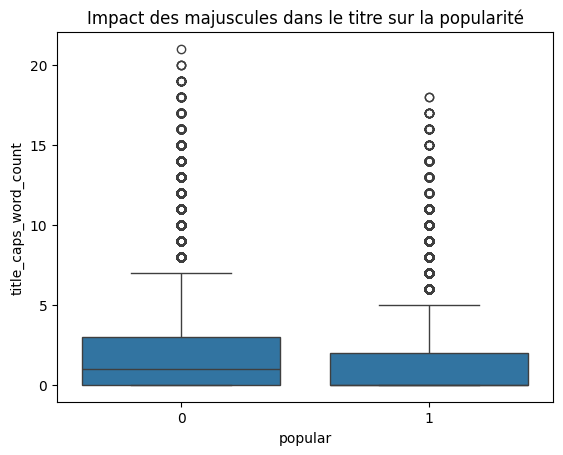

In [37]:
# Moyenne de popularité par heure (si tu as gardé publish_hour)
sns.boxplot(x='popular', y='title_caps_word_count', data=df_model)
plt.title("Impact des majuscules dans le titre sur la popularité")
plt.show()

en peut dire que trop de majuscules dans le titre nuisent à la popularité.

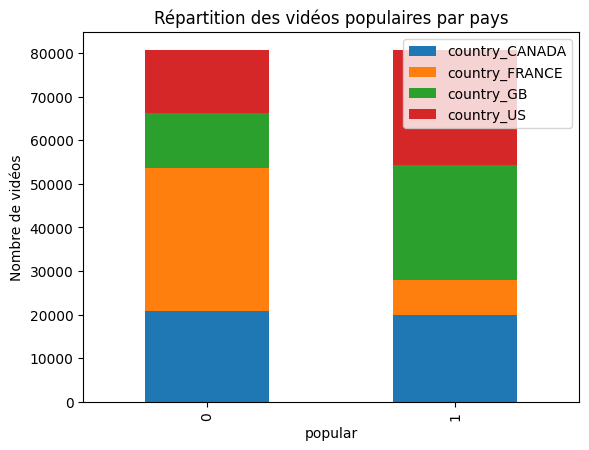

In [38]:
countries = ['country_CANADA', 'country_FRANCE', 'country_GB', 'country_US']
df_model[countries + ['popular']].groupby('popular').sum().plot(kind='bar', stacked=True)
plt.title("Répartition des vidéos populaires par pays")
plt.ylabel("Nombre de vidéos")
plt.show()

Les données montrent une forte corrélation entre les USA/GB et le succès (popular=1), tandis que la France est sous-représentée.(risque de biais)

Action : Application de SMOTE pour équilibrer la classe minoritaire et éviter que le modèle ne pénalise injustement le contenu français.

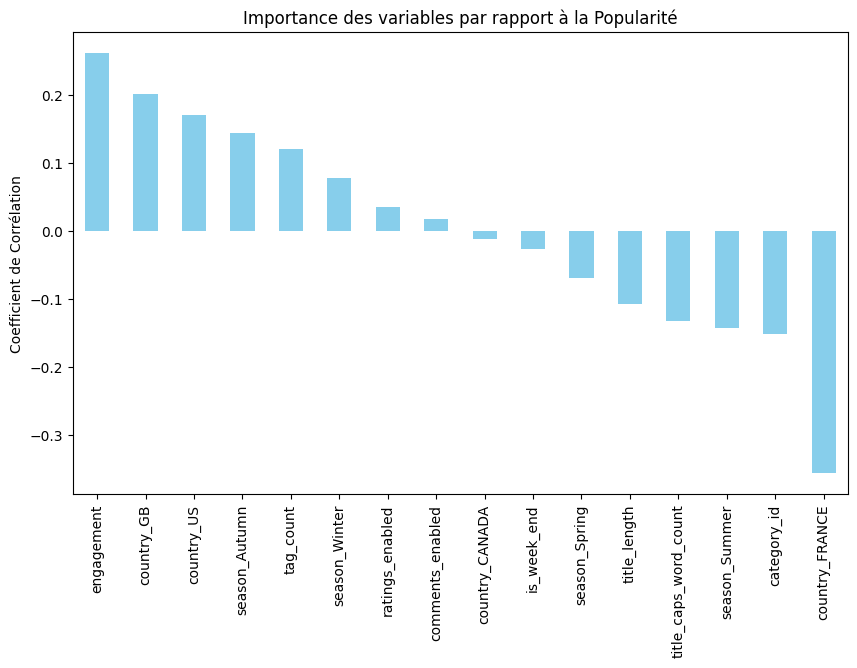

In [39]:
plt.figure(figsize=(10, 6))
# On trie les corrélations avec la cible 'popular'
correlations = df_model.corr()['popular'].sort_values(ascending=False).drop('popular')
correlations.plot(kind='bar', color='skyblue')
plt.title("Importance des variables par rapport à la Popularité")
plt.ylabel("Coefficient de Corrélation")
plt.show()

# split data and normalisation

In [40]:
# 1. Séparation initiale (à faire en premier)
X = df_model.drop(columns=['popular'], errors='ignore')
y = df_model['popular']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Définition des colonnes
cols_to_scale = ['title_length', 'title_caps_word_count', 'tag_count', 'engagement']

# 3. Utilisation du ColumnTransformer pour éviter le leakage
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), cols_to_scale),
    ],
    remainder='passthrough' # Garde les autres colonnes intactes
)

# 4. Fit uniquement sur le TRAIN, transform sur les deux
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

Après la phase de feature engineering, les variables numériques explicatives ont été standardisées à l’aide de la méthode RobustScaler. Cette étape permet de mettre les variables sur une même échelle, facilitant ainsi l’apprentissage des modèles sensibles aux différences d’amplitude. Contrairement au StandardScaler(qui utilise la moyenne) ou au MinMaxScaler, qui sont très sensibles aux valeurs extrêmes, cette méthode utilise la médiane et l'écart interquartile. Elle garantit ainsi une normalisation plus stable et robuste face aux valeurs aberrantes (outliers), particulièrement fréquentes dans les données de réseaux sociaux.

# **Etape 3:** Modélisation

Dans ce projet, il s'agit d'n problème de classification car on cherche à prédire une classe (populaire / non populaire) à partir des variables explicatives. Les modèles adaptés sont donc ceux de classification.


 Entraînement et validation croisée de RandomForest...


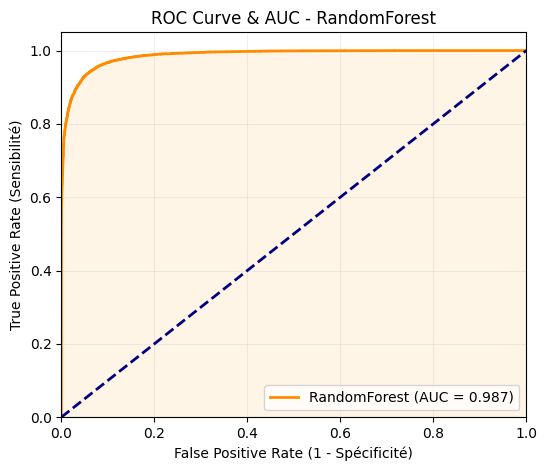


 Entraînement et validation croisée de XGBoost...


C:\Users\OULADKRIT\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [18:33:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


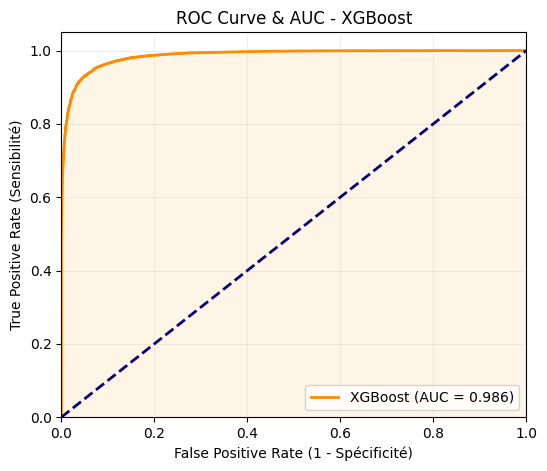


 Entraînement et validation croisée de LightGBM...
[LightGBM] [Info] Number of positive: 64588, number of negative: 64588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 129176, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\OULADKRIT\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\OULADKRIT\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


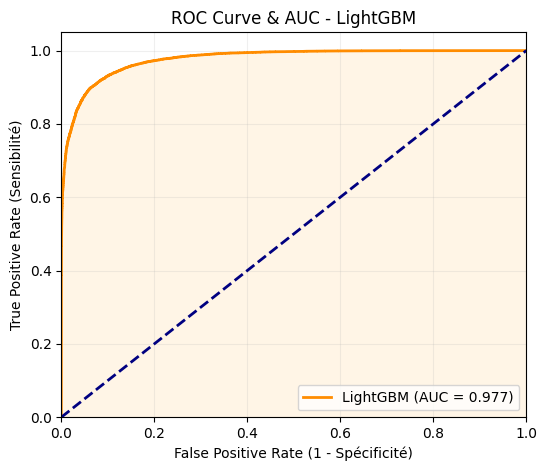


 Entraînement et validation croisée de CatBoost...


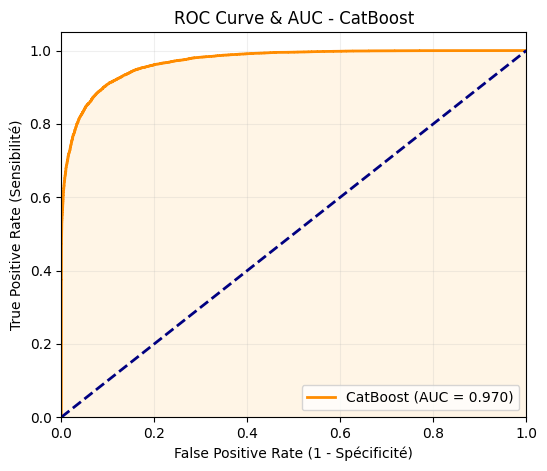


 Entraînement et validation croisée de LogisticRegression...


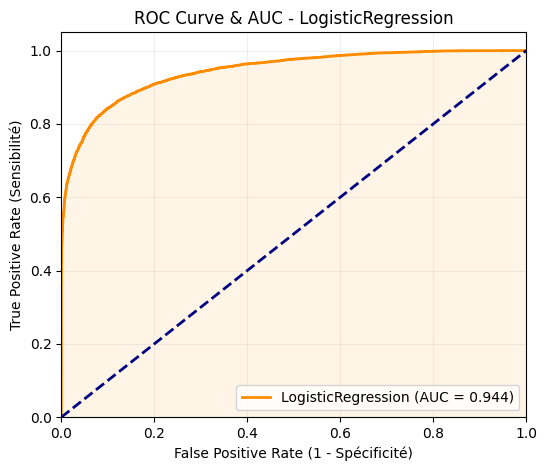


 Entraînement et validation croisée de KNN...


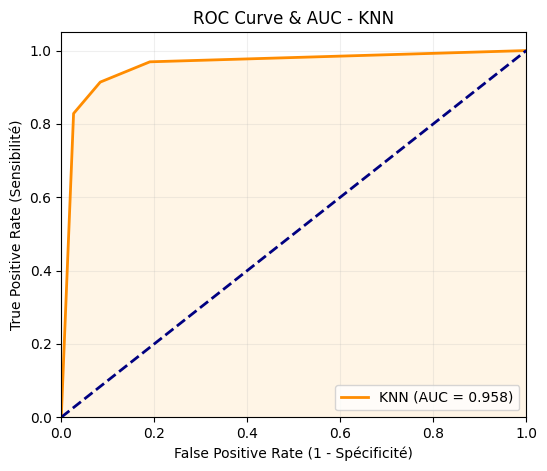

,Modèle,Meilleurs Paramètres,Accuracy,Precision,Recall,F1-Score,Log-Loss,Matrice Confusion
0,RandomForest,"{'model__max_depth': 20, 'model__n_estimators'...",0.9401,0.9459,0.9337,0.9397,0.1543,"[[15284, 863], [1071, 15076]]"
1,XGBoost,"{'model__learning_rate': 0.2, 'model__max_dept...",0.9398,0.9431,0.9360,0.9395,0.1509,"[[15236, 911], [1034, 15113]]"
2,LightGBM,"{'model__learning_rate': 0.2, 'model__n_estima...",0.9170,0.9242,0.9085,0.9163,0.1993,"[[14943, 1204], [1477, 14670]]"
5,KNN,{'model__n_neighbors': 3},0.9151,0.9160,0.9140,0.9150,1.1310,"[[14794, 1353], [1389, 14758]]"
3,CatBoost,"{'model__iterations': 200, 'model__learning_ra...",0.9039,0.9135,0.8924,0.9028,0.2228,"[[14782, 1365], [1738, 14409]]"
4,LogisticRegression,{'model__C': 1},0.8701,0.9111,0.8202,0.8632,0.2998,"[[14855, 1292], [2904, 13243]]"



 Meilleur modèle : RandomForest (Accuracy = 0.9401)


In [41]:
# Modèles + hyperparamètres avec équilibrage des classes
models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__max_depth": [5, 10, 20]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(
            use_label_encoder=False, 
            eval_metric="logloss", 
            random_state=42,
            scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Ratio classe négative/positive
        ),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__max_depth": [3, 6, 10],
            "model__learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(
            random_state=42,
            class_weight='balanced'  # LightGBM supporte class_weight
        ),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(
            verbose=0, 
            random_state=42,
            auto_class_weights='Balanced'  # Équilibrage automatique dans CatBoost
        ),
        "params": {
            "model__iterations": [50, 100, 200],
            "model__learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(
            max_iter=500, 
            solver='liblinear',
            class_weight='balanced'  # Équilibrage des classes
        ),
        "params": {
            "model__C": [0.01, 0.1, 1, 10]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 10]
        }
        # Note: KNN n'a pas de paramètre class_weight natif
    }
}

# GridSearch + Évaluation

results = []
best_model = None
best_score = 0
best_model_name = ""

for name, m in models.items():
    print(f"\n Entraînement et validation croisée de {name}...")

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', m["model"])
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=m["params"],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    # Prédictions
    y_pred = grid.best_estimator_.predict(X_test)

    if hasattr(grid.best_estimator_, "predict_proba"):
        y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    loss = log_loss(y_test, y_proba) if y_proba is not None else None

    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": grid.best_params_,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "Log-Loss": round(loss, 4) if loss else None,
        "Matrice Confusion": confusion_matrix(y_test, y_pred).tolist()
    })

    # Courbe ROC
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        
        plt.figure(figsize=(6, 5))
        
        # Tracer la ligne de la courbe
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {auc:.3f})')
        
        # --- AJOUT ICI : Colorer l'aire sous la courbe ---
        plt.fill_between(fpr, tpr, color='navajowhite', alpha=0.3)
        
        # Ligne de base (aléatoire)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate (1 - Spécificité)")
        plt.ylabel("True Positive Rate (Sensibilité)")
        plt.title(f"ROC Curve & AUC - {name}")
        plt.legend(loc="lower right")
        plt.grid(alpha=0.2)
        plt.show()

    # Sélection meilleur modèle
    if accuracy > best_score:
        best_score = accuracy
        best_model = grid.best_estimator_
        best_model_name = name


df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(df_results)

print(f"\n Meilleur modèle : {best_model_name} (Accuracy = {best_score:.4f})")


In [ ]:
!pip install -r requirements.txt
!streamlit run app_youtube_trend.py

^C
Defaulting to user installation because normal site-packages is not writeable
  Using cached streamlit-1.31.0-py2.py3-none-any.whl.metadata (8.1 kB)
  Using cached pandas-2.2.0.tar.gz (4.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [32 lines of output]
  + meson setup C:\Users\OULADKRIT\AppData\Local\Temp\pip-install-ol5ckbql\pandas_a7c78403f0144a7db904962425057543 C:\Users\OULADKRIT\AppData\Local\Temp\pip-install-ol5ckbql\pandas_a7c78403f0144a7db904962425057543\.mesonpy-j2a7rgts\build -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --vsenv --native-file=C:\Users\OULADKRIT\AppData\Local\Temp\pip-install-ol5ckbql\pandas_a7c78403f0144a7db904962425057543\.mesonpy-j2a7rgts\build\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.1
  Source dir: C:\Users\OULADKRIT\AppData\Local\Temp\pip-install-ol5ckbql\pandas_a7c78403f0144a7db904962425057543
  Build dir: C:\Users\OULADKRIT\AppData\Local\Temp\pip-install-ol5ckbql\pandas_a7c78403f0144a7db904962425057543\.mesonpy-j2a7rgts\build
  Build type: native build
  Project name: pandas
  Project version: 2.2.0
  Activating VS 16.11